# Group 17 DSCI Project (Section 007)
### Predicting diabetes based on demographic attributes, medical history, and clinical measurements

Darby Quinn #19752633 <br>
Manav Parikh #13928775 <br>
Nitya Goel #89433221 <br>
Reeva Bansal #68061514 <br>

### Introduction

Diabetes is a common condition that affects people of all ages. In individuals with diabetes, the body either doesn't make enough insulin or can’t use insulin properly. This can cause serious health problems such as heart disease, vision loss, kidney disease and high blood pressure (BP). There are certain medical factors (e.g. BMI, age, insulin and glucose levels) that can help predict whether an individual is likely to have or develop diabetes. Using these factors and making predictions on whether someone has diabetes can help ensure that proper precautions are taken or treatments are administered to manage the negative short and long term effects of diabetes.

The question we are answering is: **Can we classify whether or not someone has diabetes based on their age and glucose levels?**

The dataset we are using to answer this question is a Diabetes dataset from the online website Kaggle with nine different columns: number of pregnancies; blood glucose level; BP; skin thickness; blood insulin level; BMI; diabetes pedigree function; age; and outcome. It is a .csv file that is pre-divided into training and testing data, with no missing values. The dataset has previously been useful in using classification to predict diabetes outcome, as well as studying risk factors and diabetes management. 

In [1]:
#loading libraries needed to perform classification and analysis
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Methods & Results

The general procedure we will follow will be:
1. Reading the data into R from the web
2. Ensuring the data is in a tidy format
3. Performing summary statistics of the data set
4. Creating an exploratory visualization of the dataset
5. Summarizing the data to select the predictor variables
6. Determining the best K-value to use by cross validation
7. Creating the the K-nearest neighbors classifier with the training set 
8. Determining the accuracy of the classifier

#### 1. Reading the data into R from the web
The data set is located on kaggle at https://www.kaggle.com/datasets/ehababoelnaga/diabetes-dataset/data. We will load the training and testing data into R using the download.file and read.csv functions, then display the first 6 observations of each set.

In [2]:
#reading in training data
url <- "https://raw.githubusercontent.com/nityag11/DSCI-100-group17-project/main/Training%20(1).csv"
download.file(url, "Training (1).csv")
training_data <- read.csv("Training (1).csv")
head(training_data)

#reading in testing data
url <- "https://raw.githubusercontent.com/nityag11/DSCI-100-group17-project/main/Testing.csv"
download.file(url, "Testing.csv")
testing_data <- read.csv("Testing.csv")
head(testing_data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,9,120,72,22,56,20.8,0.733,48,0
2,1,71,62,0,0,21.8,0.416,26,0
3,8,74,70,40,49,35.3,0.705,39,0
4,5,88,78,30,0,27.6,0.258,37,0
5,10,115,98,0,0,24.0,1.022,34,0
6,0,124,56,13,105,21.8,0.452,21,0


#### 2. Ensuring the data is in a tidy format
Tidy data refers to a dataset where every variable is in its own column, each observation is in its own row and each value has its own cell. By inspecting the data frames above, we determine that the training and testing datasets are already tidy. 

#### 3. Performing summary statistics of the data set
Our next step to perform some exploratory analysis by calculating statistics on our data sets. This will include checking for missing values and determing the mean of each predictor value.

To start, we will determine whether or not there are any missing values in the training and testing dataset using the map_df function, then create a table to clearly summarize the findings. 

In [3]:
#checking for NAs in training dataset
training_missing <- training_data |>
    map_df(is.na) |>
    group_by(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome) |>
    summarize()

training_missing_table <- training_missing |>
    pivot_longer(Pregnancies:Outcome, names_to = "Predictors", values_to = "Has NA")
training_missing_table

#checking for NAs in testing dataset
testing_missing <- testing_data |>
    map_df(is.na) |>
    group_by(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome) |>
    summarize()

testing_missing_table <- testing_missing |>
    pivot_longer(Pregnancies:Outcome, names_to = "Predictors", values_to = "Has NA")
testing_missing_table

`summarise()` has grouped output by 'Pregnancies', 'Glucose', 'BloodPressure',
'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'. You can
override using the `.groups` argument.


Predictors,Has NA
<chr>,<lgl>
Pregnancies,FALSE
Glucose,FALSE
BloodPressure,FALSE
SkinThickness,FALSE
Insulin,FALSE
BMI,FALSE
DiabetesPedigreeFunction,FALSE
Age,FALSE
Outcome,FALSE


`summarise()` has grouped output by 'Pregnancies', 'Glucose', 'BloodPressure',
'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'. You can
override using the `.groups` argument.


Predictors,Has NA
<chr>,<lgl>
Pregnancies,FALSE
Glucose,FALSE
BloodPressure,FALSE
SkinThickness,FALSE
Insulin,FALSE
BMI,FALSE
DiabetesPedigreeFunction,FALSE
Age,FALSE
Outcome,FALSE


By inspection of the above tables, it is clear that there are no missing values in the training and testing datasets. For further exploration, we will create a table of the mean of each numerical variable in the training and testing set.

In [4]:
#creating table for mean of all training variables
training_mean <- training_data |>
    select(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) |>
    map_df(mean)

training_mean_table <- training_mean |>
    pivot_longer(Pregnancies:Age, names_to = "Predictors", values_to = "Mean")
training_mean_table

#creating table for mean of all testing variables
testing_mean <- testing_data |>
    select(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) |>
    map_df(mean)

testing_mean_table <- testing_mean |>
    pivot_longer(Pregnancies:Age, names_to = "Predictors", values_to = "Mean")
testing_mean_table

Predictors,Mean
<chr>,<dbl>
Pregnancies,3.8174797
Glucose,121.6020325
BloodPressure,68.9150407
SkinThickness,20.5313008
Insulin,80.1199187
BMI,31.9904472
DiabetesPedigreeFunction,0.4914398
Age,32.8219512


Predictors,Mean
<chr>,<dbl>
Pregnancies,3.8636364
Glucose,119.9837662
BloodPressure,69.5032468
SkinThickness,20.6948052
Insulin,77.7240260
BMI,31.8659091
DiabetesPedigreeFunction,0.4450422
Age,33.7305195


The tables above show us that the mean Age, BMI, and Blood Pressure for the training and testing data sets are similar values. 

#### 4. Creating an exploratory visualization of the dataset
To determine which of the variables from the data set would be best to create our classifier with, we will select some variables of interest, plot them against each other, and color the points based on the diabetes outcome. We start with comparing age with glucose level as well as insulin level, as we know these are two significant indicators of diabetes.

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Outcome = fct_recode(Outcome, Yes = "1", No = "0")`.
Caused by warning:
! Unknown levels in `f`: 1, 0”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `Outcome = fct_recode(Outcome, Yes = "1", No = "0")`.
Caused by warning:
! Unknown levels in `f`: 1, 0”


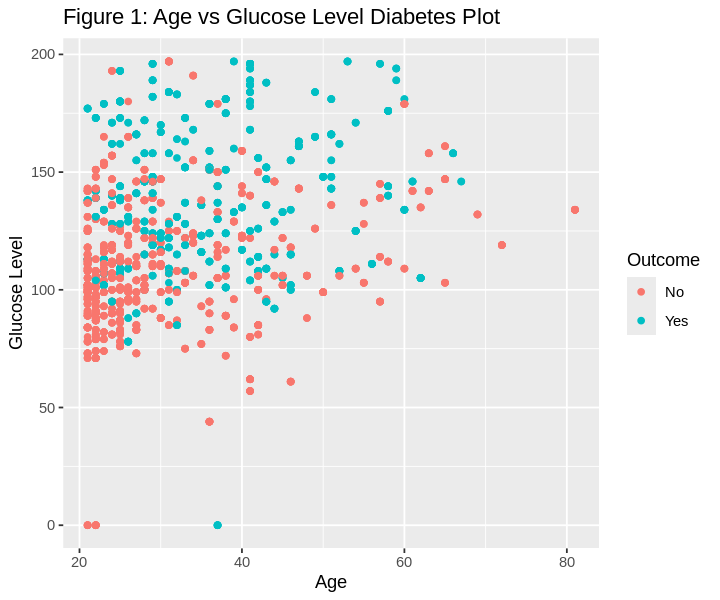

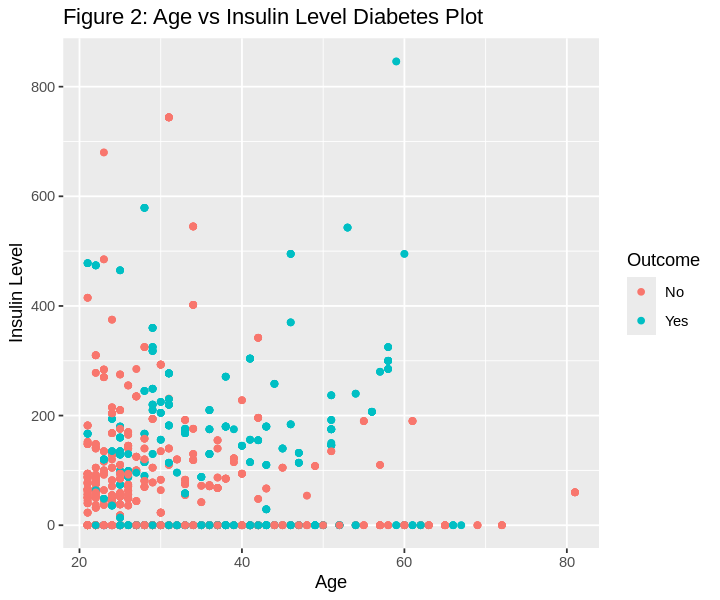

In [17]:
#changing outcome variable from <int> to <fct>
training_data <- training_data |>
    mutate(Outcome = as_factor(Outcome)) |>
    mutate(Outcome = fct_recode(Outcome, "Yes" = "1", "No" = "0")) 

testing_data <- testing_data |>
    mutate(Outcome = as_factor(Outcome)) |>
    mutate(Outcome = fct_recode(Outcome, "Yes" = "1", "No" = "0")) 

#creating comparison plots
options(repr.plot.height = 5, repr.plot.width = 6)
age_glucose_plot <- training_data |>
    ggplot(aes(x = Age, y = Glucose, color = Outcome)) +
    geom_point() +
    labs(x = "Age", y = "Glucose Level", title = "Figure 1: Age vs Glucose Level Diabetes Plot")
age_glucose_plot

options(repr.plot.height = 5, repr.plot.width = 6)
age_glucose_plot <- training_data |>
    ggplot(aes(x = Age, y = Insulin, color = Outcome)) +
    geom_point() +
    labs(x = "Age", y = "Insulin Level", title = "Figure 2: Age vs Insulin Level Diabetes Plot")
age_glucose_plot

Inspection of the above plots reveals that there is some correlation between higher age and likelihood of diabetes. There is also a visible increase in diabetes with higher glucose levels. However, the insulin plot appears to be more inconclusive. This leads us to chose Age and Glucose as our two predictor variables for this classifier. 

#### 5. Summarizing the data to select the predictor variables
Now that we have determined our predictor variables, our next step is to wrangle the datasets so that they only contain the variables of interest. In our case, these are Age, Glucose, and the Outcome. This will be done through the select function. The Outcome variable will be renamed to Diabetes_Outcome using the rename function.

In [6]:
#summarizing training data
training_data_small <- training_data |>
    select(Age, Glucose, Outcome) |>
    rename(Diabetes_Outcome = Outcome)
head(training_data_small)

#summarizing testing data
testing_data_small <- testing_data |>
    select(Age, Glucose, Outcome) |>
    rename(Diabetes_Outcome = Outcome)
head(testing_data_small)

,Age,Glucose,Diabetes_Outcome
,<int>,<int>,<fct>
1,50,148,Yes
2,31,85,No
3,32,183,Yes
4,21,89,No
5,33,137,Yes
6,30,116,No


,Age,Glucose,Diabetes_Outcome
,<int>,<int>,<fct>
1,48,120,No
2,26,71,No
3,39,74,No
4,37,88,No
5,34,115,No
6,21,124,No


Our final step before starting the formal classification is to visualize the predictor variables using histogram plots for both the training and testing data sets.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


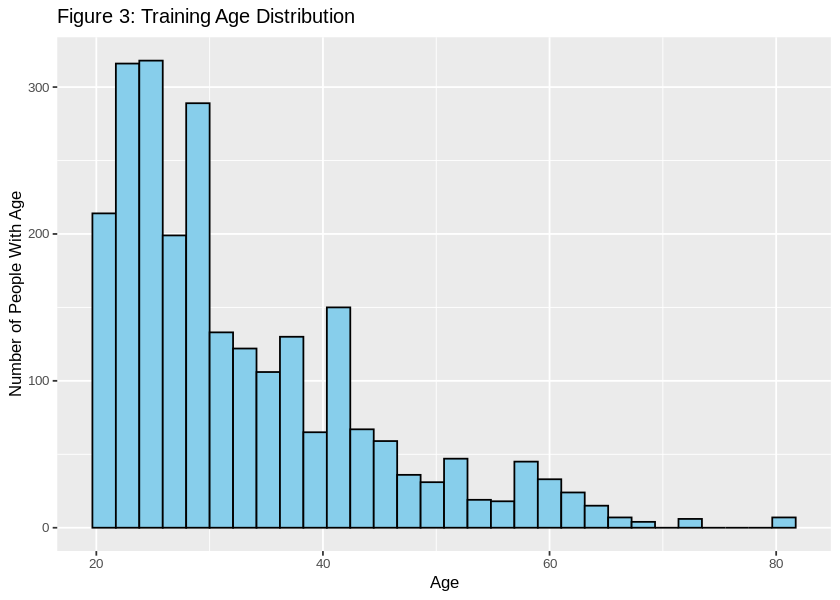

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


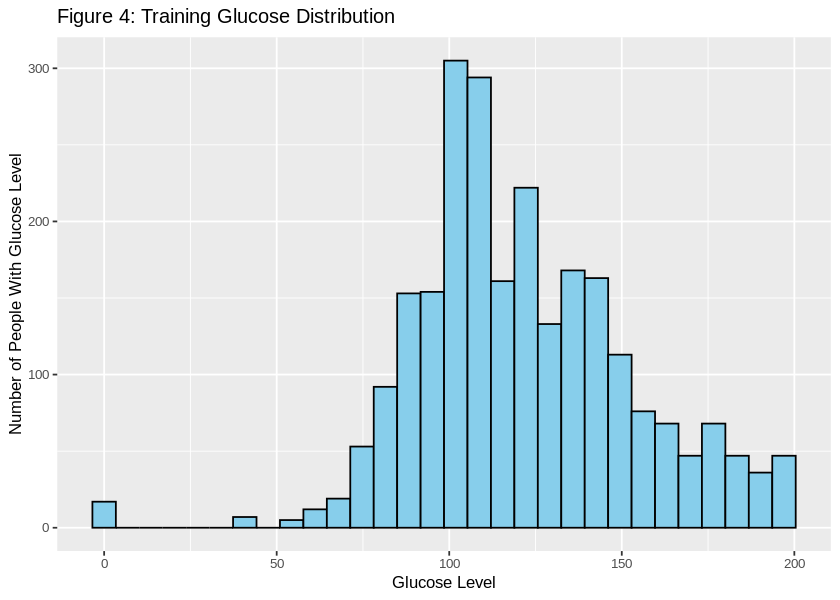

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


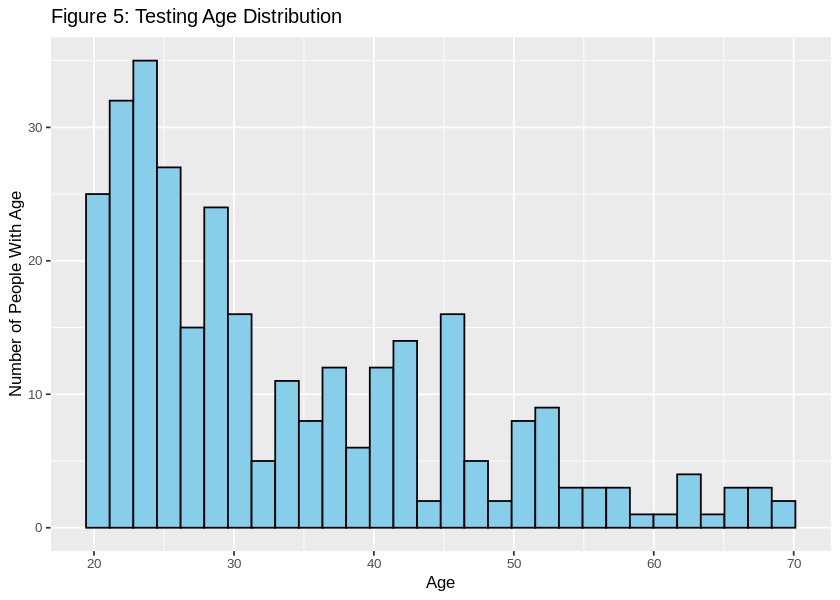

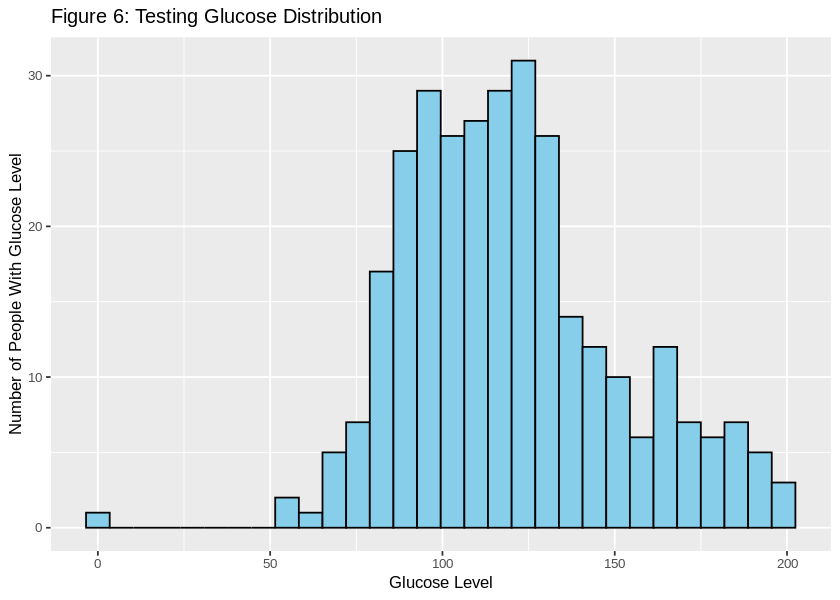

In [18]:
options(repr.plot.width=7, repr.plot.height=5)
#histogram for training age distribution
training_age_distribution <- training_data_small |>
    ggplot(aes(x = Age)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Age", y = "Number of People With Age") +
    ggtitle("Figure 3: Training Age Distribution") +
    theme(text = element_text(size = 10))
training_age_distribution

#histogram for training Glucose distribution
training_glucose_distribution <- training_data_small |>
    ggplot(aes(x = Glucose)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Glucose Level", y = "Number of People With Glucose Level") +
    ggtitle("Figure 4: Training Glucose Distribution") +
    theme(text = element_text(size = 10))
training_glucose_distribution

#histogram for testing age distribution
testing_age_distribution <- testing_data_small |>
    ggplot(aes(x = Age)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Age", y = "Number of People With Age") +
    ggtitle("Figure 5: Testing Age Distribution") +
    theme(text = element_text(size = 10))
testing_age_distribution

#histogram for testing Glucose distribution
testing_glucose_distribution <- testing_data_small |>
    ggplot(aes(x = Glucose)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Glucose Level", y = "Number of People With Glucose Level") +
    ggtitle("Figure 6: Testing Glucose Distribution") +
    theme(text = element_text(size = 10))
testing_glucose_distribution


By inspecting the above histograms, we can compare the distributions between the training and testing data.

**Number of people with age vs Age (training vs testing)**

The training age distribution is right-skewed, with its center around the 20-30 age range, a broad spread from early 20s to over 80, and a long right tail, indicating that fewer people are represented as age increases. In comparison, the testing age distribution, also right-skewed, has a higher and narrower peak around the 20-25 age range, suggesting a younger median age, with a shorter spread, topping out around 70, and less pronounced tail, which, along with lower overall frequencies, implies a smaller sample size than the training distribution. Both distributions share a common trend of declining frequency with increasing age but differ in range and concentration of data points.

**Number of people with glucose level vs Glucose Level (training vs testing)**

The training glucose level distribution is a bell-shaped curve with outlier at 0. It is not symmetrical on either sides of the peak. There is a particularly broad spread from 500’s to 520’s. The centre is at 500 with the range from about 0 to 100. This indicates that the majority of individuals have glucose level values concentrated around a central value of 500, with fewer individuals having lower values. However, the testing glucose level distribution is a bell-shaped curve with a modest left skew, peaking around a glucose level of 520. It has an outlier at 0. The curve is almost symmetrical but is little stretched out towards the left side, ranging from about 0 to 100. Overall, both of the graphs are bell-shaped, but the testing one is a little left skewed which means the central tendency of the distribution (mean, median, mode) is typically close to each other but not very close because of the skewness.

#### 6. Determining the best K-value to use by cross validation
Now that the exploratory analysis is complete, we move onto creating our classifier. The first step in using the knn algorithm is to determine the most optimal K-value. We will start by creating a recipe with our chosen predictor variables. We will then create a workflow and use cross validation to make a plot that will show us the optimal K-value.

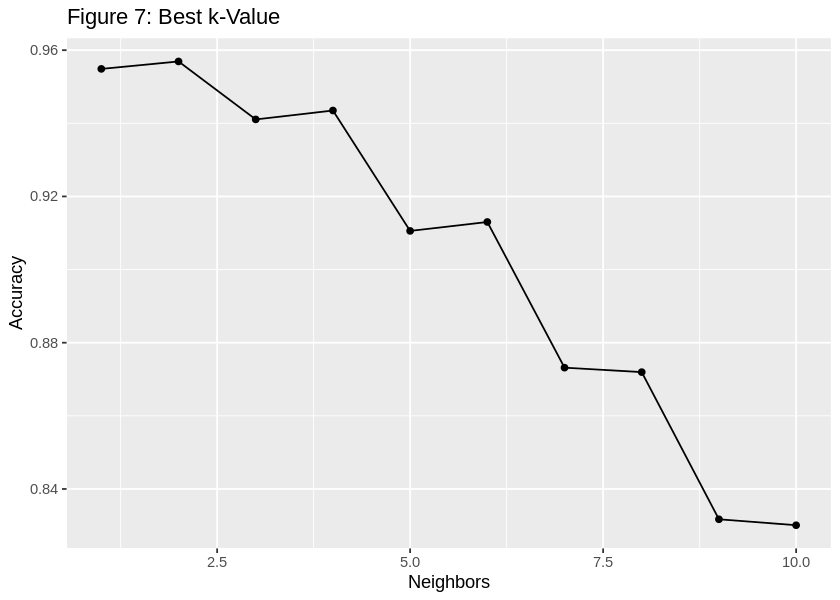

In [19]:
set.seed(1234) 

options(repr.plot.height = 5, repr.plot.width = 7)

diabetes_recipe <- recipe(Diabetes_Outcome ~ Glucose + Age, data = training_data_small) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

v_fold <- vfold_cv(training_data_small, v = 5, strata = Diabetes_Outcome) 

diabetes_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_values <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

diabetes_workflow <- workflow() |>
    add_recipe(diabetes_recipe) |>
    add_model(diabetes_spec)

tuned_diabetes_workflow <- diabetes_workflow |>
    tune_grid(resamples = v_fold, grid = k_values) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

cross_val_plot <- tuned_diabetes_workflow %>%
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy", title = "Figure 7: Best k-Value")
    
cross_val_plot

Our best K-value plot shows us that the accuracy starts high at 1 neighbor, then becomes better with 2 neighbours. However, It significantly decreases after 2 neighbours. This leads us to chose K = 2 for our classifier.

#### 7. Creating the k-nearest neighbors classification model with testing data
Using the K-value we determined in the last step, we will create a recipe and model which will then be used to create our classification workflow. We will then create a new observation (in the training data) and use our workflow to make a prediction on the diabetes outcome of this new observation.

In [9]:
# Make model/workflow
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
    set_engine("kknn") |>
    set_mode("classification")

diabetes_outcome_fit <- workflow() |>
    add_recipe(diabetes_recipe) |>
    add_model(knn_spec) |>
    fit(data = training_data_small)
diabetes_outcome_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.03414634
Best kernel: rectangular
Best k: 2

Some text here

#### 8. Determining the accuracy of the classifier
With the k-nearest neighbors model we made on the training data (diabetes_outcome_fit), we will make predictions on the testing data and then use these predictions to determine the accuracy of our model.

In [10]:
# Make new tibble
diabetes_predicted <- predict(diabetes_outcome_fit, testing_data_small) |>
    bind_cols(testing_data_small)
head(diabetes_predicted)

.pred_class,Age,Glucose,Diabetes_Outcome
<fct>,<int>,<int>,<fct>
No,48,120,No
No,26,71,No
No,39,74,No
No,37,88,No
Yes,34,115,No
No,21,124,No


Some text here

In [11]:
diabetes_predicted_accuracy <- diabetes_predicted |> metrics(truth = Diabetes_Outcome, estimate = .pred_class)
diabetes_predicted_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6818182
kap,binary,0.2803395


### Discussion: <br>
summarize what you found <br>
discuss whether this is what you expected to find? <br>
discuss what impact could such findings have? <br>
discuss what future questions could this lead to? <br>

### References <br>
At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references). <br>
Make sure to cite the source of your data as well. 